# Loading Image

In [312]:
from PIL import Image
import torch
import numpy as np
import json
boxes, templates = [], []
# file path datasets/bop23_challenge/results/cnos_exps/visualization/sam_pbr_icbin/icbin000001/000008.png
rgb_path = "datasets/bop23_challenge/datasets/icbin/test/000001/rgb/000002.png"
mask_path = "datasets/bop23_challenge/datasets/icbin/test/000001/mask_visib/000002_000000.png"
scene_gt_info = json.load(open("datasets/bop23_challenge/datasets/icbin/test/000001/scene_gt_info.json", 'r'))
scene_gt = json.load(open("datasets/bop23_challenge/datasets/icbin/test/000001/scene_gt.json", 'r'))
rgb = Image.open(rgb_path) # rgb path = datasets/bop23_challenge/datasets/icbin/train_pbr/000003/rgb/000725.jpg
mask = Image.open(mask_path) # mask_path = /datasets/bop23_challenge/datasets/icbin/train_pbr/000003/mask_visib/000725_000018.png
masked_rgb = Image.composite(
    rgb, Image.new("RGB", rgb.size, (0, 0, 0)), mask
)
boxes.append(mask.getbbox())
# image = torch.from_numpy(np.array(masked_rgb.convert("RGB")) / 255).float() # torch.Size([480, 640, 3])
image = torch.from_numpy(np.array(masked_rgb.convert("RGB"))) # torch.Size([480, 640, 3])
templates.append(image)
templates = torch.stack(templates).permute(0, 3, 1, 2) # to get (Np, 3, 480,640)

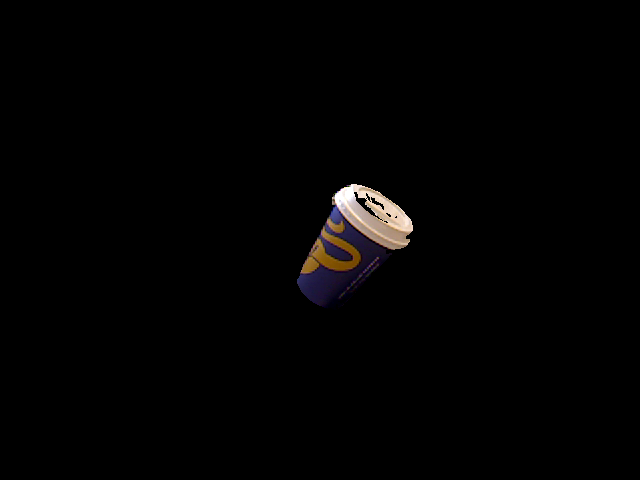

In [313]:
masked_rgb

# Rendering Templates

In [314]:
obj_id = 0 # object in the scene- zB we have 19 objects- in the scene do
R, t = np.array(scene_gt["2"][obj_id]["cam_R_m2c"]).reshape(3,3), np.array(scene_gt["2"][obj_id]["cam_t_m2c"])*0.7
template_pose = np.eye(4)
template_pose[:3,:3] = R
template_pose[:3, 3] = t
template_poses = []
template_poses.append(template_pose)
np.save("feature_comparision_test/custom_template_poses.npy", template_poses)

In [315]:
import os, sys
import numpy as np
import shutil
from tqdm import tqdm
import time
from functools import partial
import multiprocessing
import logging
import os, sys
import os.path as osp
from src.poses.utils import get_obj_poses_from_template_level

# set level logging
logging.basicConfig(level=logging.INFO)
import logging
import hydra
from omegaconf import DictConfig, OmegaConf
import numpy as np

cad_path = "datasets/bop23_challenge/datasets/icbin/models/models/obj_000001.ply"
obj_pose_path = "feature_comparision_test/custom_template_poses.npy"
output_dir = "feature_comparision_test/obj_000001"
gpus_devices = "0,1,2,3"
disable_output = True

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

command = f"python -m src.poses.pyrender {cad_path} {obj_pose_path} {output_dir} {gpus_devices}"
if disable_output:
    command += " true"
else:
    command += " false"
os.system(command)

Namespace(cad_path='datasets/bop23_challenge/datasets/icbin/models/models/obj_000001.ply', obj_pose='feature_comparision_test/custom_template_poses.npy', output_dir='feature_comparision_test/obj_000001', gpus_devices='0,1,2,3', disable_output='true', light_itensity=0.6, radius=1)


0

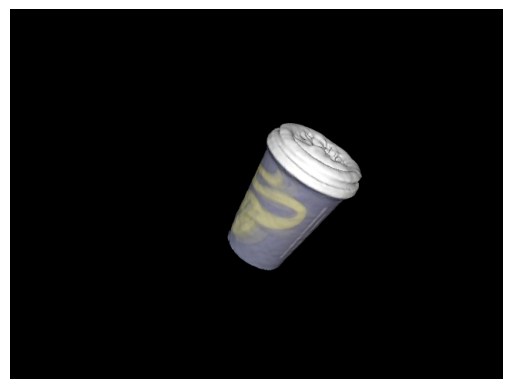

In [316]:
import matplotlib.pyplot as plt
from torchvision.io import read_image
reference = read_image("feature_comparision_test/obj_000001/000000.png")[:3]
# reference = torch.from_numpy(np.array(reference.convert("RGB")) / 255).float() # torch.Size([480, 640, 3])
# Plot the image using matplotlib
plt.imshow(reference.permute(1,2,0))
plt.axis('off')  # Turn off axis labels
plt.show()

In [317]:
# # crop template from proposals- just get the crop one for the mask not the whole image input
# from src.utils.bbox_utils import CropResizePad
# processing_config = {'image_size': 224, 'max_num_scenes': 10, 'max_num_frames': 500, 'min_visib_fract': 0.8, 'num_references': 200, 'use_visible_mask': True}
# proposal_processor = CropResizePad(processing_config["image_size"])

In [318]:
# import torchvision.transforms as T
# rgb_transform = T.Compose(
#     [
#         T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#     ]
# )

# Getting Cropped Image
Crop the object out of the image

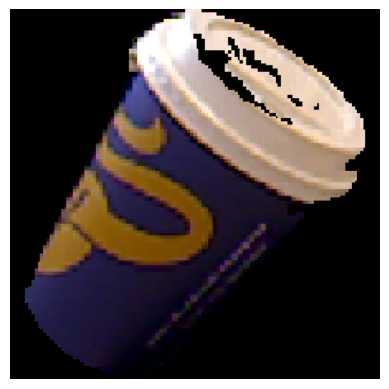

In [319]:
import matplotlib.pyplot as plt
boxes = torch.tensor(np.array(boxes))
templates_croped = proposal_processor(images=templates, boxes=boxes)
# templates_output = {"templates": rgb_transform(templates_croped)} # to normalize the template 
# Plot the image using matplotlib
plt.imshow(templates_croped[0].permute(1, 2, 0))
plt.axis('off')  # Turn off axis labels
plt.show()

In [320]:
# from src.model.loss import PairwiseSimilarity
# cosine_similarity = PairwiseSimilarity(metric="cosine", chunk_size=16)

In [321]:
# query = templates_output["templates"][0]

In [322]:
# from PIL import Image
# import torch
# import numpy as np
# import json
# boxes, templates = [], []
# # file path datasets/bop23_challenge/results/cnos_exps/visualization/sam_pbr_icbin/icbin000001/000008.png
# rgb_path = "datasets/bop23_challenge/datasets/icbin/test/000001/rgb/000002.png"
# mask_path = "datasets/bop23_challenge/datasets/icbin/test/000001/mask_visib/000002_000006.png"
# scene_gt_info = json.load(open("datasets/bop23_challenge/datasets/icbin/test/000001/scene_gt_info.json", 'r'))
# scene_gt = json.load(open("datasets/bop23_challenge/datasets/icbin/test/000001/scene_gt.json", 'r'))
# rgb = Image.open(rgb_path) # rgb path = datasets/bop23_challenge/datasets/icbin/train_pbr/000003/rgb/000725.jpg
# mask = Image.open(mask_path) # mask_path = /datasets/bop23_challenge/datasets/icbin/train_pbr/000003/mask_visib/000725_000018.png
# masked_rgb = Image.composite(
#     rgb, Image.new("RGB", rgb.size, (0, 0, 0)), mask
# )
# boxes.append(mask.getbbox())
# # image = torch.from_numpy(np.array(masked_rgb.convert("RGB")) / 255).float() # torch.Size([480, 640, 3])
# image = torch.from_numpy(np.array(masked_rgb.convert("RGB")))# torch.Size([480, 640, 3])
# templates.append(image)
# templates = torch.stack(templates).permute(0, 3, 1, 2)

In [323]:

# boxes = torch.tensor(np.array(boxes))
# templates_croped = proposal_processor(images=templates, boxes=boxes)
# # templates_output = {"templates": rgb_transform(templates_croped)} # to normalize the template 

In [324]:
# from torchvision.utils import save_image
# save_image(templates_croped[0],"feature_comparision_test/obj_000001/proposals")

In [325]:
# # templates_croped[0] and  reference using them to compare the cosine similarity
# from src.model.loss import PairwiseSimilarity
# cosine_similarity = PairwiseSimilarity(metric="cosine", chunk_size=16)

# Extracting Features
Using Dinov2 for both cropped proposals and templates

In [326]:
import torch
from torchvision import transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

# Load the image
image_path = "feature_comparision_test/obj_000001/000000.png"
image = read_image(image_path)

# Remove the alpha channel if it exists
if image.shape[0] == 4:
    image = image[:3]

# Resize the image to 224x224
resize = transforms.Resize((224, 224))
image_resized = resize(image)

# Normalize the image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_normalized = normalize(image_resized.float() / 255.0)

# Add a batch dimension
image_batch = image_normalized.unsqueeze(0).to("cuda:0")

# Load the DINOv2 model
dinov2 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14').to("cuda:0")

# Ensure the model is in evaluation mode
dinov2.eval()

# Extract features
with torch.no_grad():
    template_features = dinov2(image_batch)

Using cache found in /home/cuong.vandam/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN


In [327]:
import torch
from torchvision import transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

# Load the image
image = templates_croped[0]

# Remove the alpha channel if it exists
if image.shape[0] == 4:
    image = image[:3]

# Resize the image to 224x224
resize = transforms.Resize((224, 224))
image_resized = resize(image)

# Normalize the image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_normalized = normalize(image_resized.float() / 255.0)

image_batch = image_normalized.unsqueeze(0).to("cuda:0")

dinov2 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14').to("cuda:0")

dinov2.eval()

with torch.no_grad():
    proposal_features = dinov2(image_batch)

Using cache found in /home/cuong.vandam/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN


# Comparing Cosine Similarity 
Compute the similarity between the 2 extracted features

In [328]:
from torch.nn.functional import cosine_similarity
output = cosine_similarity(template_features, proposal_features)
output

tensor([0.6705], device='cuda:0')

# Comparing with 42 Templates 
using given dinos as well as the given consine similarity code

In [329]:
## Dino Model
from src.model.dinov2 import CustomDINOv2
import torch
descriptor_model = CustomDINOv2(
        model_name="dinov2_vitl14",
        model=torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14'),
        token_name="x_norm_clstoken",
        image_size=224,
        chunk_size=16,
        descriptor_width_size=640,
        patch_size=14,
)

Using cache found in /home/cuong.vandam/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN
INFO:root:Init CustomDINOv2 done!
INFO:root:Init CustomDINOv2 with full size=640 and proposal size=224 done!


In [330]:
def find_matched_proposals(self, proposal_decriptors):
    # compute matching scores for each proposals
    scores = self.matching_config.metric(
        proposal_decriptors, self.ref_data["descriptors"]
    )  # N_proposals x N_objects x N_templates
    if self.matching_config.aggregation_function == "mean":
        score_per_proposal_and_object = (
            torch.sum(scores, dim=-1) / scores.shape[-1]
        )  # N_proposals x N_objects
    elif self.matching_config.aggregation_function == "median":
        score_per_proposal_and_object = torch.median(scores, dim=-1)[0]
    elif self.matching_config.aggregation_function == "max":
        score_per_proposal_and_object = torch.max(scores, dim=-1)[0]
    elif self.matching_config.aggregation_function == "avg_5":
        score_per_proposal_and_object = torch.topk(scores, k=5, dim=-1)[0] # average the top 5 scores to get teh final score
        score_per_proposal_and_object = torch.mean(
            score_per_proposal_and_object, dim=-1
        )
    else:
        raise NotImplementedError

    # assign each proposal to the object with highest scores
    score_per_proposal, assigned_idx_object = torch.max(
        score_per_proposal_and_object, dim=-1
    )  # N_query

    idx_selected_proposals = torch.arange(
        len(score_per_proposal), device=score_per_proposal.device
    )[score_per_proposal > self.matching_config.confidence_thresh]
    pred_idx_objects = assigned_idx_object[idx_selected_proposals]
    pred_scores = score_per_proposal[idx_selected_proposals]
    return idx_selected_proposals, pred_idx_objects, pred_scores

# Nhap

In [331]:
poses = np.load("src/poses/predefined_poses/cam_poses_level0.npy")
poses.shape

(42, 4, 4)

In [332]:
obj_poses = np.load("src/poses/predefined_poses/obj_poses_level0.npy")
obj_poses.shape

(42, 4, 4)

In [333]:
obj_poses[1]-poses[1]

array([[ 0.00000000e+00, -5.71874910e-01, -1.62455557e-01,
         1.62455559e+02],
       [ 5.71874910e-01,  0.00000000e+00, -1.02572053e+00,
         4.99995261e+02],
       [ 1.62455557e-01,  1.02572053e+00,  0.00000000e+00,
         1.85065443e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])